In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
data_dir_train = pathlib.Path("D:\\Melonoma Assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train")
data_dir_test = pathlib.Path("D:\\Melonoma Assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Test")

In [3]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [4]:
batch_size = 32
img_height = 180
img_width = 180

In [5]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                           image_size = (180, 180),
                                                           validation_split = 0.2,
                                                           subset = "training",seed=123,batch_size=32,labels='inferred',
                                                           color_mode = 'rgb',
                                                           shuffle = True)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


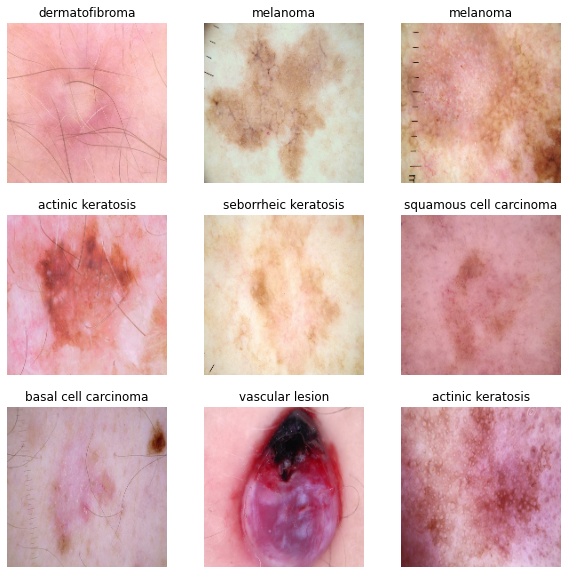

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [6]:
val_ds=tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                           image_size = (180, 180),
                                                           validation_split = 0.2,
                                                           subset = "validation",seed=123,batch_size=32,labels='inferred',
                                                           color_mode = 'rgb',
                                                           shuffle = True)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,Activation,MaxPooling2D
from tensorflow.keras.utils import normalize
from keras.preprocessing.image import ImageDataGenerator

In [11]:
model = Sequential()
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
normalized_training_set = train_ds.map(lambda x, y: (normalization_layer(x), y))
normalized_val_set = val_ds.map(lambda x, y: (normalization_layer(x), y))
training_image_batch,training_labels_batch = next(iter(normalized_training_set))
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(180,180,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 118336)            0         
                                                                 
 dense (Dense)               (None, 64)                7

In [12]:
epochs = 20
history = model.fit(
  normalized_training_set,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 25s 436ms/step - loss: 2.4211 - accuracy: 0.2600 - val_loss: 123.7313 - val_accuracy: 0.3557
Epoch 2/20
56/56 [==============================] - 24s 423ms/step - loss: 1.7518 - accuracy: 0.3672 - val_loss: 173.1086 - val_accuracy: 0.2953
Epoch 3/20
56/56 [==============================] - 23s 409ms/step - loss: 1.6087 - accuracy: 0.4202 - val_loss: 86.0803 - val_accuracy: 0.4944
Epoch 4/20
56/56 [==============================] - 23s 420ms/step - loss: 1.4212 - accuracy: 0.5117 - val_loss: 123.5459 - val_accuracy: 0.4161
Epoch 5/20
56/56 [==============================] - 22s 401ms/step - loss: 1.3432 - accuracy: 0.5312 - val_loss: 132.4553 - val_accuracy: 0.4318
Epoch 6/20
56/56 [==============================] - 21s 380ms/step - loss: 1.2620 - accuracy: 0.5485 - val_loss: 169.5023 - val_accuracy: 0.3781
Epoch 7/20
56/56 [==============================] - 20s 363ms/step - loss: 1.2185 - accuracy: 0.5575 - val_loss: 151.5842 - val_acc

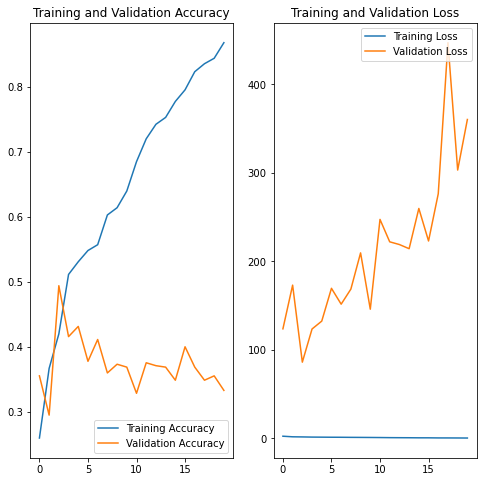

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [14]:
## from the data it is evident that the model is overfitting, we can see that from the train and validation accuracy. in order to overcme this we use data augmentation that is increasing the data set

In [15]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [16]:
model = Sequential()
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
normalized_training_set = train_ds.map(lambda x, y: (normalization_layer(x), y))
normalized_val_set = val_ds.map(lambda x, y: (normalization_layer(x), y))
training_image_batch,training_labels_batch = next(iter(normalized_training_set))
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(180,180,3)))
model.add(data_augmentation)
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 sequential_1 (Sequential)   (None, 178, 178, 32)      0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 118336)           

In [17]:
epochs = 20
history = model.fit(
  normalized_training_set,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


C:\Users\aksha\anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_2/sequential_1/random_rotation/loop_body/GatherV2/pfor/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_2/sequential_1/random_rotation/loop_body/GatherV2/pfor/Reshape:0", shape=(None, 178, 178, 32), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_2/sequential_1/random_rotation/loop_body/GatherV2/pfor/Cast:0", shape=(4,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


56/56 [==============================] - 111s 2s/step - loss: 2.1744 - accuracy: 0.2522 - val_loss: 127.8149 - val_accuracy: 0.3378
Epoch 2/20
56/56 [==============================] - 110s 2s/step - loss: 1.7023 - accuracy: 0.4012 - val_loss: 185.0959 - val_accuracy: 0.3758
Epoch 3/20
56/56 [==============================] - 111s 2s/step - loss: 1.5583 - accuracy: 0.4520 - val_loss: 154.2505 - val_accuracy: 0.3848
Epoch 4/20
56/56 [==============================] - 110s 2s/step - loss: 1.4475 - accuracy: 0.5039 - val_loss: 161.1846 - val_accuracy: 0.4295
Epoch 5/20
56/56 [==============================] - 114s 2s/step - loss: 1.5172 - accuracy: 0.4704 - val_loss: 148.0479 - val_accuracy: 0.3244
Epoch 6/20
56/56 [==============================] - 110s 2s/step - loss: 1.4010 - accuracy: 0.5229 - val_loss: 184.3611 - val_accuracy: 0.4116
Epoch 7/20
56/56 [==============================] - 110s 2s/step - loss: 1.3637 - accuracy: 0.5318 - val_loss: 161.2955 - val_accuracy: 0.3982
Epoch 8/20

In [18]:
## the accuracy of train and test both has been dropped due to data augmentation.

In [19]:
from tensorflow.keras.layers import Dropout

In [20]:
model = Sequential()
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
normalized_training_set = train_ds.map(lambda x, y: (normalization_layer(x), y))
normalized_val_set = val_ds.map(lambda x, y: (normalization_layer(x), y))
training_image_batch,training_labels_batch = next(iter(normalized_training_set))
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(180,180,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2, input_shape=(60,)))
model.add(Dropout(0.2, input_shape=(60,)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.2, input_shape=(60,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 89, 89, 32)        0         
                                                                 
 dropout_1 (Dropout)         (None, 89, 89, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                  

In [21]:
epochs = 20
history = model.fit(
  normalized_training_set,
  validation_data=normalized_val_set,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 28s 496ms/step - loss: 3.7059 - accuracy: 0.1853 - val_loss: 2.1404 - val_accuracy: 0.2573
Epoch 2/20
56/56 [==============================] - 27s 490ms/step - loss: 1.9836 - accuracy: 0.2684 - val_loss: 1.9970 - val_accuracy: 0.2796
Epoch 3/20
56/56 [==============================] - 27s 489ms/step - loss: 1.8330 - accuracy: 0.3460 - val_loss: 1.9029 - val_accuracy: 0.2908
Epoch 4/20
56/56 [==============================] - 28s 491ms/step - loss: 1.6663 - accuracy: 0.4090 - val_loss: 1.7656 - val_accuracy: 0.3490
Epoch 5/20
56/56 [==============================] - 27s 488ms/step - loss: 1.5923 - accuracy: 0.4464 - val_loss: 1.6308 - val_accuracy: 0.4362
Epoch 6/20
56/56 [==============================] - 27s 490ms/step - loss: 1.4843 - accuracy: 0.4794 - val_loss: 1.5317 - val_accuracy: 0.4855
Epoch 7/20
56/56 [==============================] - 28s 491ms/step - loss: 1.4317 - accuracy: 0.5073 - val_loss: 1.5364 - val_accuracy: 0.4922

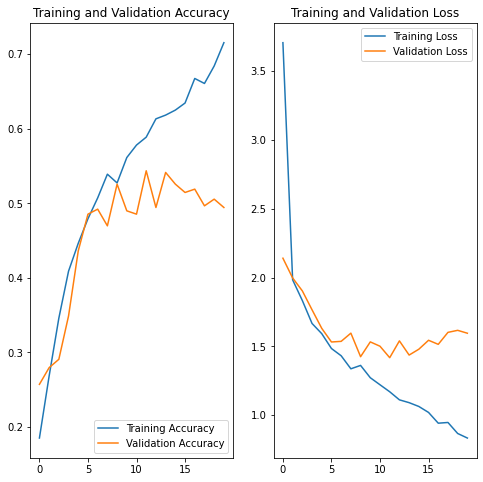

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [23]:
## after using the drop out the accuracy is comparitively high but we need a better model and reason for this may be class imbalancce

In [24]:
j=[]
for i in class_names:
    path1=os.path.join(data_dir_train,i)
    j.append(len(os.listdir(path1)))
s=max(j)
res = {class_names[i]: j[i] for i in range(len(class_names))}   
res1= {class_names[i]: (j[i]/s) for i in range(len(class_names))}   
print (res)
print (res1)


{'actinic keratosis': 114, 'basal cell carcinoma': 376, 'dermatofibroma': 95, 'melanoma': 438, 'nevus': 357, 'pigmented benign keratosis': 462, 'seborrheic keratosis': 77, 'squamous cell carcinoma': 181, 'vascular lesion': 139}
{'actinic keratosis': 0.24675324675324675, 'basal cell carcinoma': 0.8138528138528138, 'dermatofibroma': 0.20562770562770563, 'melanoma': 0.948051948051948, 'nevus': 0.7727272727272727, 'pigmented benign keratosis': 1.0, 'seborrheic keratosis': 0.16666666666666666, 'squamous cell carcinoma': 0.3917748917748918, 'vascular lesion': 0.3008658008658009}


In [25]:
# As we can see from the above there is clearly an evidence of classimbalance, we can use augmentation to increase the data set 
#pigmented benign keratosis': 1.0 has the max data points and that will be 462. least no of data is in seborrheic keratosis:0.166

In [26]:
!pip install Augmentor

In [27]:
path_to_training_dataset="D:\\Melonoma Assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(os.path.join(path_to_training_dataset,i))
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

Initialised with 114 image(s) found.
Output directory set to D:\Melonoma Assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1D3A7ED2130>: 100%|█| 500/500 [00:03<00:00, 149.06 Samples


Initialised with 376 image(s) found.
Output directory set to D:\Melonoma Assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1D3A7A73580>: 100%|█| 500/500 [00:03<00:00, 149.77 Samples


Initialised with 95 image(s) found.
Output directory set to D:\Melonoma Assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\dermatofibroma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1D3A7ED3B80>: 100%|█| 500/500 [00:03<00:


Initialised with 438 image(s) found.
Output directory set to D:\Melonoma Assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x1D3A7A91DF0>: 100%|█| 500/500 [00:16<00:00, 30.23 Samples/


Initialised with 357 image(s) found.
Output directory set to D:\Melonoma Assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\nevus\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1504x1129 at 0x1D3A7AA2880>: 100%|█| 500/500 [00:14<0


Initialised with 462 image(s) found.
Output directory set to D:\Melonoma Assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1D3A7A88EE0>: 100%|█| 500/500 [00:03<00:00, 150.02 Samples


Initialised with 77 image(s) found.
Output directory set to D:\Melonoma Assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\seborrheic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x1D3A539C730>: 100%|█| 500/500 [00:07<00


Initialised with 181 image(s) found.
Output directory set to D:\Melonoma Assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1D388FFB6D0>: 100%|█| 500/500 [00:03<00:00, 145.92 Samples


Initialised with 139 image(s) found.
Output directory set to D:\Melonoma Assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1D388EDAD90>: 100%|█| 500/500 [00:03<00:00, 143.19 Samples


In [28]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [31]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['D:\\Melonoma Assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_005eb74b-cb8e-4aa5-915a-9d236ff403bf.jpg',
 'D:\\Melonoma Assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_16a02dc3-f900-4aed-9cd5-f78a529829ac.jpg',
 'D:\\Melonoma Assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_335a9f86-cb39-4813-9c1d-836ca1677a7a.jpg',
 'D:\\Melonoma Assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_5934462f-ec75-4cfe-b835-a253d52d55e3.jpg',
 'D:\\Melonoma Assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_

In [32]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [33]:
batch_size = 32
img_height = 180
img_width = 180

In [40]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [51]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)
df2

,Path,Label
0,D:\Melonoma Assignment\Skin cancer ISIC The In...,actinic keratosis
1,D:\Melonoma Assignment\Skin cancer ISIC The In...,actinic keratosis
2,D:\Melonoma Assignment\Skin cancer ISIC The In...,actinic keratosis
3,D:\Melonoma Assignment\Skin cancer ISIC The In...,actinic keratosis
4,D:\Melonoma Assignment\Skin cancer ISIC The In...,actinic keratosis
...,...,...
4495,D:\Melonoma Assignment\Skin cancer ISIC The In...,vascular lesion
4496,D:\Melonoma Assignment\Skin cancer ISIC The In...,vascular lesion
4497,D:\Melonoma Assignment\Skin cancer ISIC The In...,vascular lesion
4498,D:\Melonoma Assignment\Skin cancer ISIC The In...,vascular lesion


In [52]:
df2['Label'].value_counts()

actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: Label, dtype: int64

In [53]:
batch_size = 32
img_height = 180
img_width = 180

In [59]:
data_dir_train="D:\\Melonoma Assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset = 'training',
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [61]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset = 'validation',
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [62]:
model = Sequential()
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
normalized_training_set = train_ds.map(lambda x, y: (normalization_layer(x), y))
normalized_val_set = val_ds.map(lambda x, y: (normalization_layer(x), y))
training_image_batch,training_labels_batch = next(iter(normalized_training_set))
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(180,180,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 118336)            0         
                                                                 
 dense_6 (Dense)             (None, 64)               

In [63]:
epochs = 50
history = model.fit(
  normalized_training_set,
  validation_data=normalized_val_set,
  epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 118s 687ms/step - loss: 1.9715 - accuracy: 0.3233 - val_loss: 1.4291 - val_accuracy: 0.4647
Epoch 2/50
169/169 [==============================] - 120s 704ms/step - loss: 1.3603 - accuracy: 0.4989 - val_loss: 1.2869 - val_accuracy: 0.5405
Epoch 3/50
169/169 [==============================] - 121s 710ms/step - loss: 1.0841 - accuracy: 0.5974 - val_loss: 1.2393 - val_accuracy: 0.5702
Epoch 4/50
169/169 [==============================] - 124s 725ms/step - loss: 0.8757 - accuracy: 0.6888 - val_loss: 1.0350 - val_accuracy: 0.6518
Epoch 5/50
169/169 [==============================] - 120s 702ms/step - loss: 0.6626 - accuracy: 0.7711 - val_loss: 0.9516 - val_accuracy: 0.6771
Epoch 6/50
169/169 [==============================] - 123s 717ms/step - loss: 0.5300 - accuracy: 0.8214 - val_loss: 0.8955 - val_accuracy: 0.7298
Epoch 7/50
169/169 [==============================] - 122s 714ms/step - loss: 0.4548 - accuracy: 0.8457 - val_loss: 1.0338 -

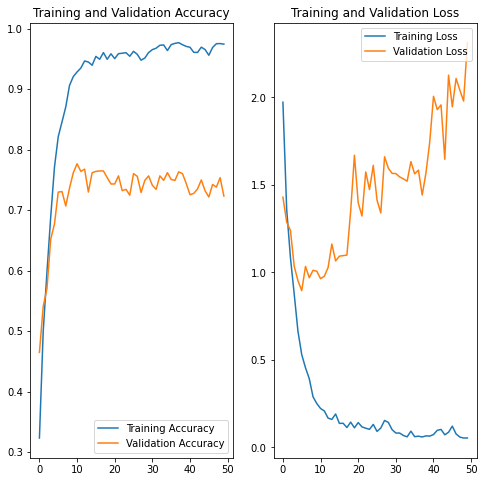

In [64]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [65]:
## from the above graph it is evident that the val accuracy does not improve beyond an epocs of 15. trying drop out to create a new model to check if the val accuracy improves

In [69]:
model = Sequential()
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
normalized_training_set = train_ds.map(lambda x, y: (normalization_layer(x), y))
normalized_val_set = val_ds.map(lambda x, y: (normalization_layer(x), y))
training_image_batch,training_labels_batch = next(iter(normalized_training_set))
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(180,180,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2, input_shape=(60,)))
model.add(Dropout(0.2, input_shape=(60,)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.2, input_shape=(60,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 89, 89, 32)        0         
                                                                 
 dropout_10 (Dropout)        (None, 89, 89, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                 

In [70]:
epochs = 20
history = model.fit(
  normalized_training_set,
  validation_data=normalized_val_set,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 95s 557ms/step - loss: 2.4853 - accuracy: 0.2038 - val_loss: 1.9272 - val_accuracy: 0.2383
Epoch 2/20
169/169 [==============================] - 100s 586ms/step - loss: 1.6251 - accuracy: 0.3822 - val_loss: 1.5117 - val_accuracy: 0.4543
Epoch 3/20
169/169 [==============================] - 99s 585ms/step - loss: 1.4140 - accuracy: 0.4666 - val_loss: 1.4229 - val_accuracy: 0.4699
Epoch 4/20
169/169 [==============================] - 94s 554ms/step - loss: 1.3349 - accuracy: 0.5017 - val_loss: 1.2803 - val_accuracy: 0.5397
Epoch 5/20
169/169 [==============================] - 98s 577ms/step - loss: 1.1669 - accuracy: 0.5708 - val_loss: 1.2518 - val_accuracy: 0.5731
Epoch 6/20
169/169 [==============================] - 95s 558ms/step - loss: 1.0688 - accuracy: 0.6072 - val_loss: 1.2154 - val_accuracy: 0.5917
Epoch 7/20
169/169 [==============================] - 100s 589ms/step - loss: 0.9546 - accuracy: 0.6567 - val_loss: 1.2145 - val_

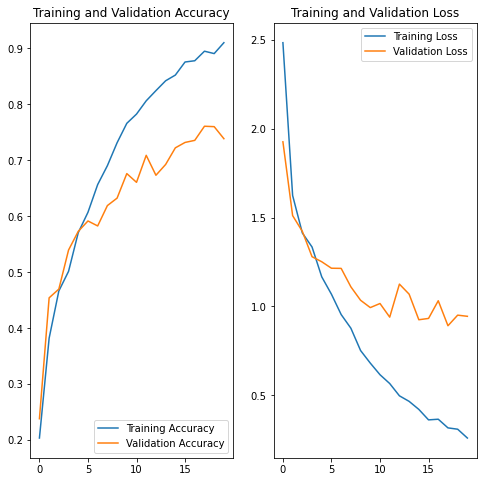

In [71]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [72]:
## there is no significant increase in val accuracy after initializing drop out so I think drop out layes can be eliminated.